<a href="https://colab.research.google.com/github/DeBusTa/Ketir/blob/main/k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pandas library dataframe
import pandas as pd
#numpy untuk array, range number, algabar linear, dll
import numpy as np
#visualisasi grafik
import matplotlib.pyplot as plt

#library untuk KNN
from sklearn.neighbors import KNeighborsClassifier

#untuk split data train dan test
from sklearn.model_selection import train_test_split

In [ ]:
#read data csv ke data frame
df = pd.read_csv('breasttissue.csv')

In [ ]:
#menghilangkan kolom case
df = df.drop(columns=['Case #'])

In [ ]:
#membagi data terikat (y) dan data bebas (x)
x = df.loc[:, df.columns != 'Class']
y = df['Class']

In [ ]:
#variabel train test, test menjadi 20% / 0.2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
#neighbours array dari 1 sampai 9
neighbors = np.arange(1,85)
#membuat array kosong dengan panjang 9
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#for untuk looping panjang dari neighbours
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

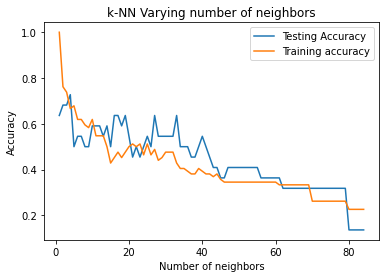

In [12]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [13]:
#menginisiasi objek dengan hyperparameter 4
knn = KNeighborsClassifier(n_neighbors=4)
    
#meng train algoritma knn hyperparameter 4
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.7272727272727273

In [15]:
#kolom untuk variabel independen/bebas/predictor
x.columns.values

array(['I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR', 'P'],
      dtype=object)

In [54]:
#input variabel perumpamaan
# input  = [[0, 1.1, 10, 0, 1.1, 1.1, 1.1, 1.1, 200]]
input  = [[0.3 for i in range(9)]]

In [55]:
#Hasil dari keyakinan model
# np.nanmax(knn.predict_proba(input))
knn.predict_proba(input)

array([[0.  , 0.  , 0.  , 0.25, 0.5 , 0.25]])

In [56]:
#Output dari keyakinan model
knn.predict(input)

array(['gla'], dtype=object)

In [48]:
#tambahan deskripsi
df.describe()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,784.251618,0.120133,0.114691,190.568642,7335.155161,23.473784,75.381258,166.710575,810.638127
std,753.950075,0.068596,0.101347,190.801448,18580.314212,23.354672,81.345838,181.309580,763.019135
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,2800.000000,0.358316,0.467748,1063.441427,174480.476200,164.071543,436.099640,977.552367,2896.582483
